In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %pip install scikit-learn
from sklearn.neural_network import MLPRegressor #ML model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('oulu_apartment_data_for_analysis.csv')
df = df.replace(r'^\s*$',np.nan,regex= True) #Set NaN to replace missing cells in the data
df.dropna(inplace = True) #Neural network does not accept NaNs
df = df.drop(columns = 'price_per_area')
df = df.drop(columns = 'region_value')
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Region,rooms,Area,Price,Year,elevator,status,plot
0,Kaukovainio,1,33.0,41500,1970,yes,good,rent
1,Myllytulli,1,37.5,96000,1992,yes,good,rent
2,Myllytulli,1,41.0,139000,2000,yes,good,own
3,Myllyoja,1,31.0,39000,1974,no,good,rent
4,Myllyoja,1,32.0,37600,1974,yes,bad,rent


In [3]:
#Data preparations
df.loc[df['elevator'].str.contains('yes', na=False), 'elevator'] = 1
df.loc[df['elevator'].str.contains('no', na=False), 'elevator'] = -1

df.loc[df['status'].str.contains('good', na=False), 'status'] = 1
df.loc[df['status'].str.contains('fair', na=False), 'status'] = 0
df.loc[df['status'].str.contains('bad', na=False), 'status'] = -1

df.loc[df['plot'].str.contains('own', na=False), 'plot'] = 1
df.loc[df['plot'].str.contains('rent', na=False), 'plot'] = -1

#One-hot-encode the Region
one_hot_encoded_region = pd.get_dummies(df['Region']).astype(int)

#Add one-hot-encoded stuff to the data
df = pd.concat([df,one_hot_encoded_region],axis = 1)

#Drop text region
df = df.drop(columns = 'Region')
df.head()
#one_hot_encoded_region

,rooms,Area,Price,Year,elevator,status,plot,Alppila,Etu-lyötty,Etu-nokela,...,Taka-lyötty,Talvikangas,Taskila,Toivoniemi,Toppila,Toppilansaari,Toppilansalmi,Tuira,Välivainio,Värttö
0,1,33.0,41500,1970,1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,37.5,96000,1992,1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,41.0,139000,2000,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,31.0,39000,1974,-1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,32.0,37600,1974,1,-1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Data selection and scaling

y = df['Price'] #Target
X = df.drop(columns = 'Price') #Features

#Data scaling
scaler = preprocessing.StandardScaler().fit(X) #Defines the scaler
X = scaler.transform(X) #Scales the data

In [5]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Define the model
model = MLPRegressor(hidden_layer_sizes = (20,40,40,20), max_iter=1500) #Define hyperparameters

#Train the model
model.fit(X_train,y_train)

#Check the model success
print('R^2 score with train data is ', model.score(X_train,y_train))
print('R^2 score with test data is ', model.score(X_test,y_test))

R^2 score with train data is  0.8091866210019834
R^2 score with test data is  0.6105943139275051


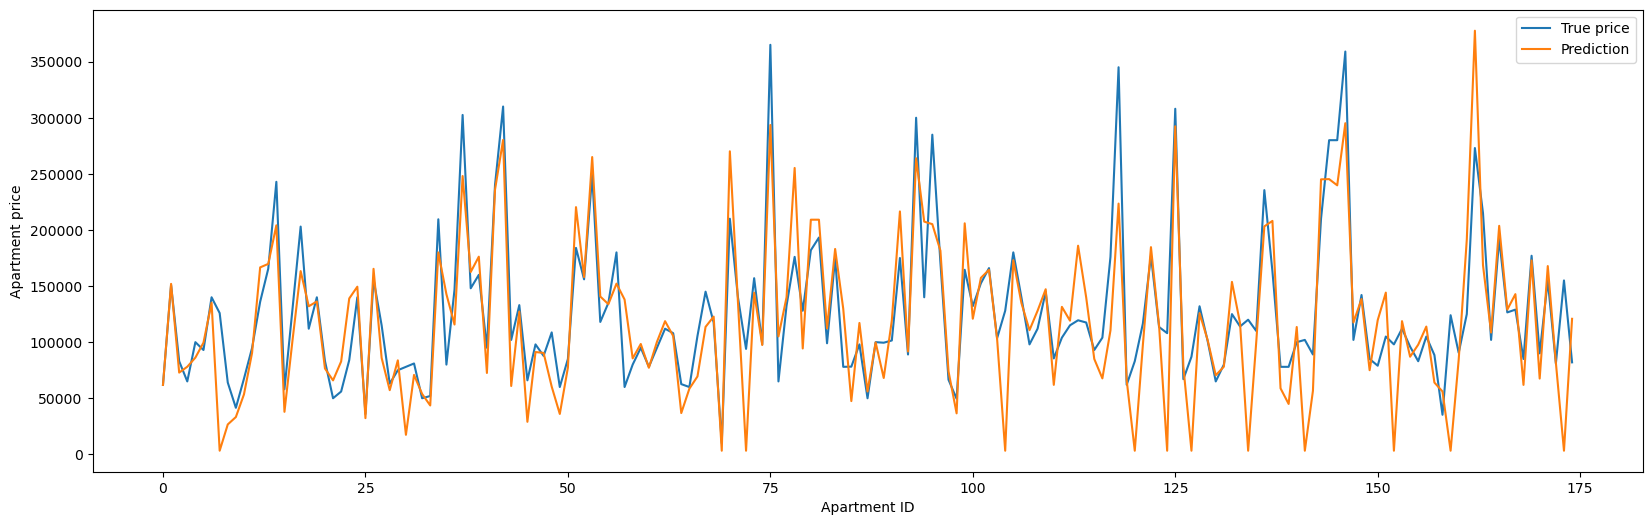

In [6]:
#Test the model
prediction = model.predict(X_test) #Predicted price

plt.figure(figsize=(20,6))
plt.plot(y_test.values) #True price
plt.plot(prediction)
plt.legend(['True price','Prediction'])
plt.ylabel('Apartment price')
plt.xlabel('Apartment ID')
plt.show()



Conclusions
- Data should be extended (if possible)
- Model seems to work

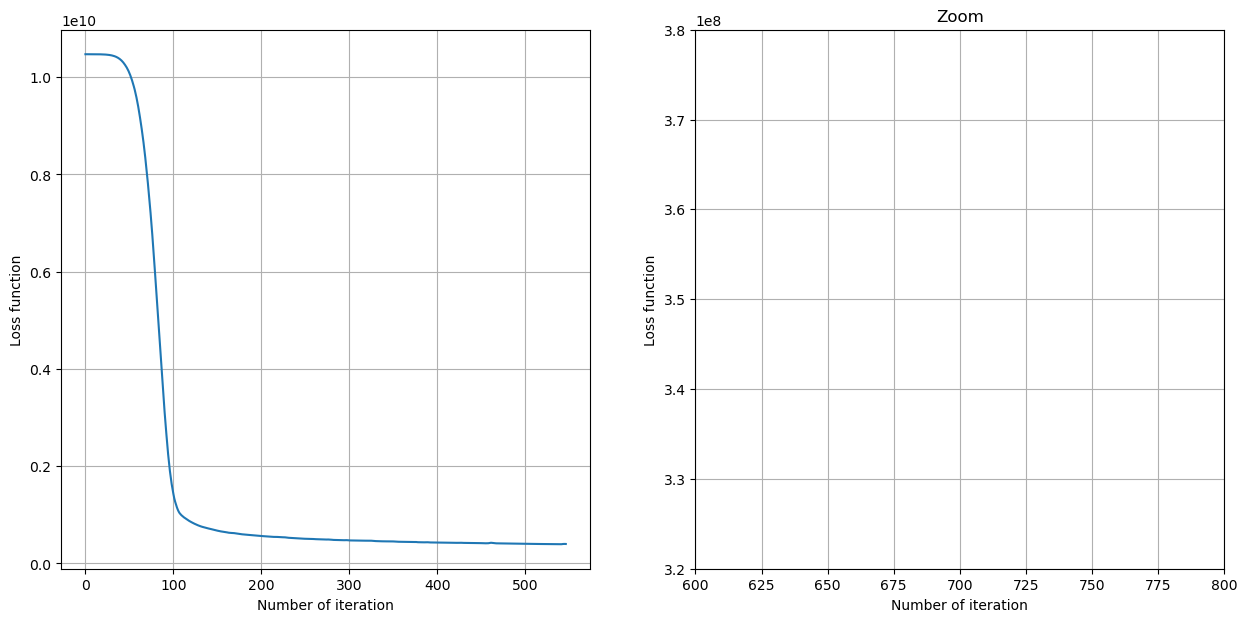

In [7]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(model.loss_curve_)
plt.ylabel('Loss function')
plt.xlabel('Number of iteration')
#plt.axis([600,800,0.32*1e9,0.38*1e9])
plt.grid()
plt.subplot(1,2,2)
plt.plot(model.loss_curve_)
plt.ylabel('Loss function')
plt.xlabel('Number of iteration')
plt.title('Zoom')
plt.axis([600,800,0.32*1e9,0.38*1e9])
plt.grid()

In [8]:
#Using the model
#Create input data frame which contains information about the apartment

Region = 'Intiö'

X_tool = df.drop(columns = 'Price')[0:1]*0 #First row of data to be used as a template
X_tool['rooms'] = 3
X_tool['Area']  = 70
X_tool['Year']  = 1952
X_tool['elevator']  = 1
X_tool['status']  = 1
X_tool['plot']  = 1
X_tool[Region] = 1

#Scaler
X = scaler.transform(X_tool)
prediction = model.predict(X)

print('Predicted price is', np.round(prediction,0), 'euros')

Predicted price is [129931.] euros


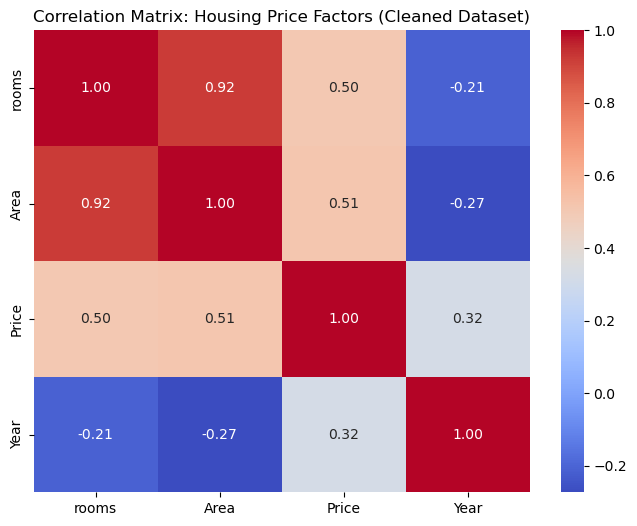

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns that exist
numeric_cols = ['rooms', 'Area', 'Price', 'Year']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Housing Price Factors (Cleaned Dataset)')
plt.show()

